<a href="https://colab.research.google.com/github/Stormbl3ss3d/QGD_OELP/blob/main/OELP_QGD_cpp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mk7

In [ ]:
%%writefile qgd.cpp
#include <iostream>
#include <vector>
#include <bitset>
#include <cmath>
#include <algorithm>

using namespace std;

//function to compute the norm of a vector
double computeNorm(const vector<double>& v) {
    double sum = 0.0;
    for (double val : v) {
        sum += val * val;
    }
    return sqrt(sum);
}

//function to normalize a vector
vector<double> normalizeVector(const vector<double>& v) {
    double norm = computeNorm(v);
    if (norm == 0) return v;  //avoid division by zero
    vector<double> normalized(v.size());
    for (size_t i = 0; i < v.size(); ++i) {
        normalized[i] = v[i] / norm;
    }
    return normalized;
}

//function to compute gradient of f(x) = ||x||^2 -> delf(x) = 2 * x
vector<double> computeGradient(const vector<double>& x) {
    vector<double> grad(x.size());
    for (size_t i = 0; i < x.size(); ++i) {
        grad[i] = 2 * x[i];
    }
    return normalizeVector(grad);  //normalize the gradient before encoding
}

//function to encode a gradient vector
string encodeGradient(const vector<double>& gradient, const vector<int>& bitAlloc, int totalBits) {
    string encodedBits;

    for (size_t i = 0; i < gradient.size(); ++i) {
        int numLevels = (1 << bitAlloc[i]);  // 2^bitAlloc[i]
        double stepSize = 2.0 / numLevels;   // step size from -1 to 1

        int quantizedIndex = min(numLevels - 1, max(0, int((gradient[i] + 1) / stepSize)));

        //dynamically set bitset size to totalBits
        bitset<512> quantizedBits(quantizedIndex); //safe upper limit 512 bits
        encodedBits += quantizedBits.to_string().substr(512 - bitAlloc[i]);
    }
    return encodedBits;
}

//function to decode a bit string into a gradient vector
vector<double> decodeGradient(const string& encodedBits, const vector<int>& bitAlloc) {
    vector<double> decodedGrad;
    size_t bitIndex = 0;

    for (size_t i = 0; i < bitAlloc.size(); ++i) {
        string bitSegment = encodedBits.substr(bitIndex, bitAlloc[i]);
        bitIndex += bitAlloc[i];

        int quantizedIndex = stoi(bitSegment, nullptr, 2);
        int numLevels = (1 << bitAlloc[i]);
        double stepSize = 2.0 / numLevels;

        double decodedValue = -1.0 + quantizedIndex * stepSize + (stepSize / 2.0);
        decodedGrad.push_back(decodedValue);
    }
    return decodedGrad;
}

int main() {
    int n = 10; //number of attributes
    vector<double> x(n, 10.0); //initial x vector (all tens for simplicity)
    vector<int> bitAlloc = {4, 5, 3, 4, 3, 5, 2, 2, 4, 5}; //custom bit allocation
    int totalBits = 120; //custom total number of bits
    double eta = 0.01; //learning rate
    int iterations = 20; //number of iterations

    cout << "Total bits allocated: " << totalBits << endl;

    for (int iter = 0; iter < iterations; ++iter) {
        //client computes gradient and encodes it
        vector<double> gradient = computeGradient(x);
        string encodedGradient = encodeGradient(gradient, bitAlloc, totalBits);

        //server decodes the received gradient
        vector<double> decodedGradient = decodeGradient(encodedGradient, bitAlloc);

        //client and server both update x (using decoded gradient)
        for (size_t i = 0; i < x.size(); ++i) {
            x[i] -= eta * decodedGradient[i]; //no denormalization
        }

        cout << "Iteration " << iter + 1 << ", x[0]: " << x[0] << endl;
    }

    return 0;
}



Overwriting qgd.cpp


# MK 8

In [7]:
%%writefile qgd.cpp
#include <iostream>
#include <vector>
#include <bitset>
#include <cmath>
#include <algorithm>

using namespace std;

//function to compute the norm of a vector
double computeNorm(const vector<double>& v) {
    double sum = 0.0;
    for (double val : v) {
        sum += val * val;
    }
    return sqrt(sum);
}

double computeSquaredNorm(const vector<double>& v) {
    double sum = 0.0;
    for (double val : v) {
        sum += val * val;
    }
    return sum;  // return ||v||^2 (without sqrt)
}


//function to normalize a vector
vector<double> normalizeVector(const vector<double>& v) {
    double norm = computeNorm(v);
    if (norm == 0) return v;  //avoid division by zero
    vector<double> normalized(v.size());
    for (size_t i = 0; i < v.size(); ++i) {
        normalized[i] = v[i] / norm;
    }
    return normalized;
}

//function to compute gradient of f(x) = ||x||^2 -> delf(x) = 2 * x
vector<double> computeGradient(const vector<double>& x) {
    vector<double> grad(x.size());
    for (size_t i = 0; i < x.size(); ++i) {
        grad[i] = 2 * x[i];
    }
    return normalizeVector(grad);  //normalize the gradient before encoding
}

//function to encode a gradient vector
string encodeGradient(const vector<double>& gradient, const vector<int>& bitAlloc, int totalBits) {
    string encodedBits;

    for (size_t i = 0; i < gradient.size(); ++i) {
        int numLevels = (1 << bitAlloc[i]);  // 2^bitAlloc[i]
        double stepSize = 2.0 / numLevels;   // step size from -1 to 1

        int quantizedIndex = min(numLevels - 1, max(0, int((gradient[i] + 1) / stepSize)));

        //dynamically set bitset size to totalBits
        bitset<512> quantizedBits(quantizedIndex); //safe upper limit 512 bits
        encodedBits += quantizedBits.to_string().substr(512 - bitAlloc[i]);
    }
    return encodedBits;
}

//function to decode a bit string into a gradient vector
vector<double> decodeGradient(const string& encodedBits, const vector<int>& bitAlloc) {
    vector<double> decodedGrad;
    size_t bitIndex = 0;

    for (size_t i = 0; i < bitAlloc.size(); ++i) {
        string bitSegment = encodedBits.substr(bitIndex, bitAlloc[i]);
        bitIndex += bitAlloc[i];

        int quantizedIndex = stoi(bitSegment, nullptr, 2);
        int numLevels = (1 << bitAlloc[i]);
        double stepSize = 2.0 / numLevels;

        double decodedValue = -1.0 + quantizedIndex * stepSize + (stepSize / 2.0);
        decodedGrad.push_back(decodedValue);
    }
    return decodedGrad;
}

int main() {
    int n = 10;  // number of attributes
    vector<double> x(n, 1.0);  // initial x vector (all ones for simplicity)
    vector<vector<int>> bitAllocations = {
        {4, 4, 4, 4, 4, 4, 4, 4, 4, 4},   // Uniform bit allocation
        {6, 5, 4, 3, 2, 3, 4, 5, 6, 7},   // Custom non-uniform allocation
        {3, 3, 3, 3, 3, 3, 3, 3, 3, 3},   // Another uniform allocation with fewer bits
        {7, 6, 5, 4, 3, 2, 1, 2, 3, 4}    // Another custom non-uniform allocation
    };
    int totalBits = 120;  // custom total number of bits
    double eta = 0.01;    // learning rate
    int iterations = 25;  // number of iterations

    // Store the squared norm for each bit allocation strategy
    vector<vector<double>> squaredNorms(bitAllocations.size(), vector<double>(iterations));

    cout << "Total bits allocated: " << totalBits << endl;

    // Iterate over each bit allocation strategy
    for (int allocIndex = 0; allocIndex < bitAllocations.size(); ++allocIndex) {
        vector<int> bitAlloc = bitAllocations[allocIndex];

        // Reset x to initial state (all ones) for each allocation strategy
        vector<double> x(n, 1.0);

        // Run the optimization for the current bit allocation
        for (int iter = 0; iter < iterations; ++iter) {
            // Compute gradient and encode it
            vector<double> gradient = computeGradient(x);
            string encodedGradient = encodeGradient(gradient, bitAlloc, totalBits);

            // Decode the gradient on the server side
            vector<double> decodedGradient = decodeGradient(encodedGradient, bitAlloc);

            // Update x using the decoded gradient
            for (size_t i = 0; i < x.size(); ++i) {
                x[i] -= eta * decodedGradient[i];  // update step
            }

            // Store the squared norm for this iteration and bit allocation
            squaredNorms[allocIndex][iter] = computeSquaredNorm(x);
        }
    }

    // Print results
    for (int allocIndex = 0; allocIndex < squaredNorms.size(); ++allocIndex) {
        cout << "Bit allocation " << allocIndex + 1 << " results: ";
        for (int iter = 0; iter < iterations; ++iter) {
            cout << squaredNorms[allocIndex][iter] << ",";
        }
        cout << endl;
    }

    return 0;
}




Writing qgd.cpp


In [25]:
!g++ -o hello qgd2.cpp

In [26]:
!./hello

Bit allocation 1 log loss results: 0.711289,0.709321,0.707357,0.705397,0.703441,0.70149,0.699543,0.6976,0.695662,0.693727,0.691798,0.689872,0.687951,0.686034,0.684122,0.682213,0.68031,0.678411,0.676516,0.674625,0.672739,0.670858,0.66902,0.667186,0.665356,0.663531,0.66171,0.660065,0.658423,0.656784,0.655149,0.653518,0.65189,0.650266,0.648646,0.647029,0.645415,0.643805,0.642199,0.640597,0.638998,0.637402,0.635811,0.634223,0.632638,0.631058,0.629481,0.627907,0.626408,0.624911,0.623419,0.621929,0.620443,0.618968,0.617488,0.61602,0.614547,0.613085,0.611619,0.610165,0.608705,0.607257,0.605805,0.604364,0.602918,0.601484,0.600045,0.598617,0.597185,0.595765,0.59434,0.592926,0.591508,0.590101,0.58869,0.58729,0.585886,0.584493,0.583095,0.581709,0.580319,0.57894,0.577557,0.576185,0.574808,0.573443,0.572074,0.570716,0.569354,0.568003,0.566648,0.565304,0.563956,0.562619,0.561278,0.559948,0.558614,0.557292,0.555965,0.554649,
Bit allocation 2 log loss results: 0.711349,0.70944,0.707536,0.705635,0.7037

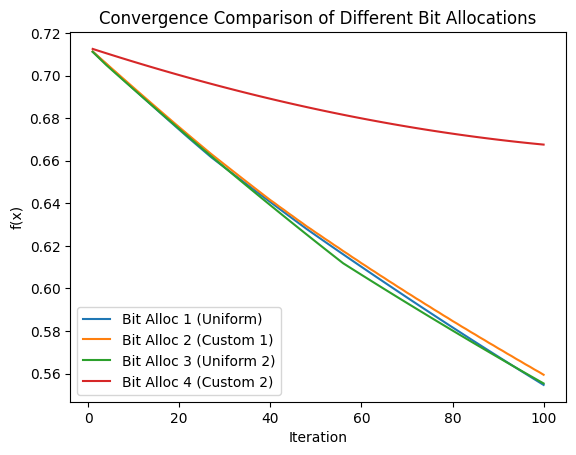

In [27]:
import matplotlib.pyplot as plt

# Sample data (replace with actual output from C++ code)
iterations = 100
bit_alloc_1 = [0.711289,0.709321,0.707357,0.705397,0.703441,0.70149,0.699543,0.6976,0.695662,0.693727,0.691798,0.689872,0.687951,0.686034,0.684122,0.682213,0.68031,0.678411,0.676516,0.674625,0.672739,0.670858,0.66902,0.667186,0.665356,0.663531,0.66171,0.660065,0.658423,0.656784,0.655149,0.653518,0.65189,0.650266,0.648646,0.647029,0.645415,0.643805,0.642199,0.640597,0.638998,0.637402,0.635811,0.634223,0.632638,0.631058,0.629481,0.627907,0.626408,0.624911,0.623419,0.621929,0.620443,0.618968,0.617488,0.61602,0.614547,0.613085,0.611619,0.610165,0.608705,0.607257,0.605805,0.604364,0.602918,0.601484,0.600045,0.598617,0.597185,0.595765,0.59434,0.592926,0.591508,0.590101,0.58869,0.58729,0.585886,0.584493,0.583095,0.581709,0.580319,0.57894,0.577557,0.576185,0.574808,0.573443,0.572074,0.570716,0.569354,0.568003,0.566648,0.565304,0.563956,0.562619,0.561278,0.559948,0.558614,0.557292,0.555965,0.554649]
bit_alloc_2 = [0.711349,0.70944,0.707536,0.705635,0.703738,0.701845,0.699956,0.698071,0.696191,0.694314,0.692441,0.690572,0.688708,0.686847,0.684991,0.683139,0.68129,0.679446,0.677606,0.675792,0.673982,0.672177,0.670375,0.668581,0.666792,0.665006,0.663225,0.661533,0.659845,0.658161,0.656481,0.654804,0.653131,0.651462,0.649796,0.648135,0.646477,0.644822,0.643172,0.641526,0.640029,0.63841,0.636921,0.635309,0.633827,0.632223,0.630748,0.629151,0.627754,0.626234,0.624843,0.62333,0.621945,0.620439,0.619061,0.617561,0.61619,0.614701,0.61334,0.611858,0.610504,0.609048,0.607721,0.606272,0.604951,0.603508,0.602194,0.600758,0.59945,0.598021,0.596737,0.595332,0.594055,0.592656,0.591385,0.589993,0.588729,0.587343,0.586085,0.584706,0.583455,0.582101,0.580876,0.579528,0.578309,0.576968,0.575755,0.57442,0.573214,0.571886,0.570686,0.569364,0.56817,0.566855,0.565668,0.564359,0.563182,0.561883,0.560712,0.55942]
bit_alloc_3 = [0.711179,0.709101,0.707028,0.70496,0.703053,0.70115,0.699252,0.697357,0.695468,0.693582,0.691701,0.689824,0.687952,0.686084,0.684221,0.682362,0.680508,0.678658,0.676812,0.674971,0.673135,0.671303,0.669476,0.667653,0.665835,0.664021,0.662212,0.660408,0.658608,0.656813,0.655023,0.653237,0.651456,0.64968,0.647908,0.646141,0.644379,0.642622,0.640869,0.639121,0.637378,0.63564,0.633906,0.632178,0.630454,0.628735,0.627021,0.625311,0.623607,0.621907,0.620213,0.618523,0.616838,0.615158,0.613483,0.611813,0.61046,0.609109,0.607762,0.606418,0.605078,0.60374,0.602406,0.601075,0.599747,0.598423,0.597101,0.595783,0.594469,0.593157,0.591849,0.590544,0.589242,0.587944,0.586648,0.585357,0.584068,0.582783,0.581501,0.580222,0.578947,0.577675,0.576406,0.57514,0.573878,0.572619,0.571364,0.570112,0.568863,0.567617,0.566375,0.565136,0.563901,0.562669,0.56144,0.560215,0.558993,0.557774,0.556559,0.555347]
bit_alloc_4 = [0.712569,0.711882,0.711198,0.710519,0.709845,0.709175,0.708509,0.707849,0.707192,0.70654,0.705893,0.70525,0.704612,0.703978,0.703349,0.702725,0.702105,0.70149,0.700879,0.700273,0.699672,0.699075,0.698483,0.697896,0.697313,0.696735,0.696162,0.695593,0.695029,0.69447,0.693916,0.693366,0.692821,0.692281,0.691746,0.691215,0.690689,0.690168,0.689652,0.689141,0.688634,0.688132,0.687636,0.687144,0.686656,0.686174,0.685697,0.685224,0.684757,0.684294,0.683836,0.683383,0.682936,0.682493,0.682055,0.681622,0.681193,0.68077,0.680352,0.679939,0.679531,0.679128,0.67873,0.678337,0.677949,0.677566,0.677188,0.676815,0.676447,0.676085,0.675727,0.675374,0.675027,0.674685,0.674347,0.674015,0.673688,0.673367,0.67305,0.672738,0.672432,0.672131,0.671835,0.671544,0.671258,0.670978,0.670703,0.670433,0.670168,0.669908,0.669654,0.669405,0.669161,0.668922,0.668689,0.668461,0.668238,0.668021,0.667808,0.667601]

# Plotting
plt.plot(range(1, iterations + 1), bit_alloc_1, label='Bit Alloc 1 (Uniform)')
plt.plot(range(1, iterations + 1), bit_alloc_2, label='Bit Alloc 2 (Custom 1)')
plt.plot(range(1, iterations + 1), bit_alloc_3, label='Bit Alloc 3 (Uniform 2)')
plt.plot(range(1, iterations + 1), bit_alloc_4, label='Bit Alloc 4 (Custom 2)')

plt.xlabel('Iteration')
plt.ylabel('f(x)')
plt.title('Convergence Comparison of Different Bit Allocations')
plt.legend()

plt.show()


# MK 9 **LogLoss**

In [24]:
%%writefile qgd2.cpp
#include <iostream>
#include <vector>
#include <bitset>
#include <cmath>
#include <algorithm>

using namespace std;

// Function to compute the squared norm of a vector
double computeSquaredNorm(const vector<double>& v) {
    double sum = 0.0;
    for (double val : v) {
        sum += val * val;
    }
    return sum;
}

// Sigmoid function
double sigmoid(double z) {
    return 1.0 / (1.0 + exp(-z));
}

// Log loss function with numerical stability
double computeLogLoss(const vector<double>& x, const vector<double>& y) {
    double loss = 0.0;
    for (size_t i = 0; i < x.size(); ++i) {
        double p = sigmoid(x[i]);
        p = max(min(p, 1.0 - 1e-9), 1e-9);  // Avoid log(0) issues
        loss += -(y[i] * log(p) + (1 - y[i]) * log(1 - p));
    }
    return loss / x.size();
}

// Gradient of log loss function
vector<double> computeLogLossGradient(const vector<double>& x, const vector<double>& y) {
    vector<double> grad(x.size());
    for (size_t i = 0; i < x.size(); ++i) {
        grad[i] = sigmoid(x[i]) - y[i];
    }
    return grad;
}

// Function to encode gradient
string encodeGradient(const vector<double>& gradient, const vector<int>& bitAlloc) {
    string encodedBits;
    for (size_t i = 0; i < gradient.size(); ++i) {
        int numLevels = (1 << bitAlloc[i]);
        double stepSize = 2.0 / numLevels;
        int quantizedIndex = round((gradient[i] + 1) / stepSize);
        quantizedIndex = min(numLevels - 1, max(0, quantizedIndex));
        bitset<512> quantizedBits(quantizedIndex);
        encodedBits += quantizedBits.to_string().substr(512 - bitAlloc[i]);
    }
    return encodedBits;
}

// Function to decode gradient
vector<double> decodeGradient(const string& encodedBits, const vector<int>& bitAlloc) {
    vector<double> decodedGrad;
    size_t bitIndex = 0;
    for (size_t i = 0; i < bitAlloc.size(); ++i) {
        if (bitIndex + bitAlloc[i] > encodedBits.size()) break; // Prevent invalid access
        string bitSegment = encodedBits.substr(bitIndex, bitAlloc[i]);
        bitIndex += bitAlloc[i];
        int quantizedIndex = stoi(bitSegment, nullptr, 2);
        int numLevels = (1 << bitAlloc[i]);
        double stepSize = 2.0 / numLevels;
        double decodedValue = -1.0 + quantizedIndex * stepSize + (stepSize / 2.0);
        decodedGrad.push_back(decodedValue);
    }
    return decodedGrad;
}

int main() {
    int n = 10;
    vector<double> y = {0.8, 0.4, 0.1, 1.0, 1.0, 0.7, 0, 1, 0, 1};
    vector<vector<int>> bitAllocations = {
        {4, 4, 4, 4, 4, 4, 4, 4, 4, 4},
        {6, 5, 4, 3, 2, 3, 4, 5, 6, 7},
        {3, 3, 3, 3, 3, 3, 3, 3, 3, 3},
        {28, 1, 1, 1, 1, 1, 1, 1, 1, 1}
    };
    double eta = 0.01;
    int iterations = 100;

    vector<vector<double>> logLosses(bitAllocations.size(), vector<double>(iterations));

    for (size_t allocIndex = 0; allocIndex < bitAllocations.size(); ++allocIndex) {
        vector<int> bitAlloc = bitAllocations[allocIndex];
        vector<double> x(n, 1.0);

        for (int iter = 0; iter < iterations; ++iter) {
            vector<double> gradient = computeLogLossGradient(x, y);
            string encodedGradient = encodeGradient(gradient, bitAlloc);
            vector<double> decodedGradient = decodeGradient(encodedGradient, bitAlloc);

            for (size_t i = 0; i < x.size(); ++i) {
                x[i] -= eta * decodedGradient[i];
            }
            logLosses[allocIndex][iter] = computeLogLoss(x, y);
        }
    }

    for (size_t allocIndex = 0; allocIndex < logLosses.size(); ++allocIndex) {
        cout << "Bit allocation " << allocIndex + 1 << " log loss results: ";
        for (double loss : logLosses[allocIndex]) {
            cout << loss << ",";
        }
        cout << endl;
    }
    return 0;
}


Overwriting qgd2.cpp
